# Model fitting and understanding . 
* V2: The operation process is simplified. 

* Turn the warning off: 
~~~~
options(warn=-1)
~~~~
* Turn the warning back on: 
~~~~
options(warn=0)
~~~~
* reference: https://stackoverflow.com/questions/16194212/how-to-suppress-warnings-globally-in-an-r-script

In [1]:
options(warn=-1)

## First step is getting the correlationship between those variables. 

In [2]:
library(rms)
data <- read.csv('J:/EECS6414/process/Pipeline/Data_cleaning/kernel_datssource_code_with_and_without_vote_0.csv')# , stringsAsFactors=FALSE

col_name <- names(data)
env_vars <- col_name
vote_num <- data[c("km_votes")]
high_voted <- data[c("high_voted")]
reject_vars <- c(#"kernel_datasets", # because they are all 1, so we can only get NaN. 
                 "kernel", "author", "id", "km_language", "km_tags", 
                "km_votes", "high_voted",  
                "km_forks", "km_comments", "km_views", 
                 #"competition", "organization" # unnecessary variables. 
    
                "km_tag_vote_median", "km_tag_vote_max", "km_tag_vote_min", "km_tag_vote_avg", "km_tag_vote_sum"
    
                "km_competition_size_max",
                "km_competition_size_min",

                "km_competition_discussion_max",
                "km_competition_discussion_min",

                "km_competition_competitor_max",
                "km_competition_competitor_min",


                "km_dataset_size_max",
                "km_dataset_size_min",

                "km_dataset_discussion_max",
                "km_dataset_discussion_min",

                "km_dataset_kernel_max",
                "km_dataset_kernel_min",

                "km_dataset_download_max",
                "km_dataset_download_min",

                "km_dataset_view_max",
                "km_dataset_view_min",

                "km_dataset_vote_max",
                "km_dataset_vote_min",

                "km_dataset_version_max",
                "km_dataset_version_min",
                "km_tags_te_max",
                "km_tags_te_min",
                "km_tags_te_median",
                "cvp_ipt_te_max",
                "cvp_ipt_te_min",
                "cvp_ipt_te_median",


                "cvp_iptfrm_te_max",
                "cvp_iptfrm_te_min",
                "cvp_iptfrm_te_median",
                "km_tag_vote_median",

                "km_tag_vote_max",
                "km_tag_vote_min",

                "km_import_vote_median",

                "km_import_vote_max",
                "km_import_vote_min",

                "km_iptfrm_vote_median",
                "km_iptfrm_vote_max",
                "km_iptfrm_vote_min"
                 )
env_vars <- env_vars[!(env_vars %in% reject_vars)]
# for (env in env_vars){
#    print(paste(env, "+"))
# }
data <- data[env_vars]

Loading required package: Hmisc
Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, units

Loading required package: SparseM

Attaching package: 'SparseM'

The following object is masked from 'package:base':

    backsolve



In [3]:
## 75% of the sample size
corr_size <- floor(0.01 * nrow(data))

## set the seed to make your partition reproducible
set.seed(123)
corr_id <- sample(seq_len(nrow(data)), size = corr_size)

data_simple <- data[corr_id, ]
nrow(data_simple)

[1] 1294

In [8]:
for (env in env_vars){
   print(paste(env, "+"))
}

[1] "cvo_num_of_cell +"
[1] "cvo_num_of_output +"
[1] "cvo_display_data +"
[1] "cvo_stream +"
[1] "cvo_execute_result +"
[1] "cvo_error +"
[1] "cvp_sloc +"
[1] "cvp_comments +"
[1] "cvp_empty +"
[1] "cvp_mccabe +"
[1] "cvp_import +"
[1] "cvp_import_from +"
[1] "km_dataSources +"
[1] "km_versions +"
[1] "km_competitions +"
[1] "km_competition_size_ttl +"
[1] "km_competition_size_avg +"
[1] "km_competition_size_max +"
[1] "km_competition_size_min +"
[1] "km_competition_discussion_ttl +"
[1] "km_competition_discussion_avg +"
[1] "km_competition_discussion_max +"
[1] "km_competition_discussion_min +"
[1] "km_competition_competitor_ttl +"
[1] "km_competition_competitor_avg +"
[1] "km_competition_competitor_max +"
[1] "km_competition_competitor_min +"
[1] "km_datasets +"
[1] "km_dataset_size_ttl +"
[1] "km_dataset_size_avg +"
[1] "km_dataset_size_max +"
[1] "km_dataset_size_min +"
[1] "km_dataset_discussion_ttl +"
[1] "km_dataset_discussion_avg +"
[1] "km_dataset_discussion_max +"
[1] "km_da

In [ ]:
normalization<-function(x){
return((x-min(x))/(max(x)-min(x)))
}
data_test <- data_simple

data_test$km_import_vote_median = normalization(data_test$km_import_vote_median)

data_test$km_import_vote_avg = normalization(data_test$km_import_vote_avg)

data_test$km_import_vote_max = normalization(data_test$km_import_vote_max)

data_test$km_import_vote_min = normalization(data_test$km_import_vote_min)
data_test$km_import_vote_sum = normalization(data_test$km_import_vote_sum)

data_test$km_iptfrm_vote_median = normalization(data_test$km_iptfrm_vote_median)

data_test$km_iptfrm_vote_avg = normalization(data_test$km_iptfrm_vote_avg)

data_test$km_iptfrm_vote_max = normalization(data_test$km_iptfrm_vote_max)

data_test$km_iptfrm_vote_min = normalization(data_test$km_iptfrm_vote_min)

data_test$km_iptfrm_vote_sum = normalization(data_test$km_iptfrm_vote_sum)

In [14]:
head(data_test)

,cvo_num_of_cell,cvo_num_of_output,cvo_display_data,cvo_stream,cvo_execute_result,cvo_error,cvp_sloc,cvp_comments,cvp_empty,cvp_mccabe,...,km_import_vote_median,km_import_vote_avg,km_import_vote_max,km_import_vote_min,km_import_vote_sum,km_iptfrm_vote_median,km_iptfrm_vote_avg,km_iptfrm_vote_max,km_iptfrm_vote_min,km_iptfrm_vote_sum
37217,0,0,0,0,0,0,48,29,25,-2,...,0.9662432,0.6737213,1,0.054932876,0.12552839,0.1960346814,0.2191262960,0.4373491784,0.0470866428,8.136106e-02
102017,10,0,0,0,0,0,115,37,58,3,...,0.1178823,0.3330368,1,0.004629139,0.22752812,0.0229551931,0.0449984842,0.0965864306,0.0017825744,2.088478e-02
52927,1,1,0,1,0,0,5,8,6,-2,...,0.9831216,0.9831216,1,0.966243587,0.12211668,0.4533802219,0.4533802219,0.4533802219,0.4533802219,4.208474e-02
114273,6,1,0,1,0,0,16,19,14,-2,...,1.0000000,1.0000000,1,1.000000000,0.06210619,0.6718607894,0.6718607894,0.6718607894,0.6718607894,6.236507e-02
121706,12,9,2,4,3,0,33,19,50,-2,...,0.8272580,0.6681610,1,0.018140699,0.16599014,0.3555387134,0.4914175711,1.0000000000,0.2545928576,1.824621e-01
5896,23,0,0,0,0,0,19,78,53,-2,...,0.5044445,0.5044445,1,0.008901696,0.06265905,0.0003516643,0.0003516643,0.0003516643,0.0003516643,3.264303e-05


In [ ]:
vcobj = varclus(~ ., 
                
                data = data_test, 
                
                similarity = "spearman",
                
                trans = "abs"
)

pdf(file="correlation.pdf", width = 15, height = 15)
plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)
dev.off()

plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)

# reject variables that closely related to each other. For now, we don't do this thing. 
# reject_vars <- c()
# env_vars <- env_vars[!(env_vars %in% reject_vars)]

In [10]:
env_vars <- c("km_dataset_discussion_avg", 
              
              "km_competition_size_avg", 
              
              
              "km_competition_competitor_avg",
              
              "km_tags_te_avg", 
              
              "km_dataSources",
              "km_Data",
              "km_versions",
              "km_isNotebook",
              "km_Hidden",
              "km_Notebook",
              "km_Visualization",
              "km_null",
              "km_Other"
             )
data <- data[env_vars]

png 
  2

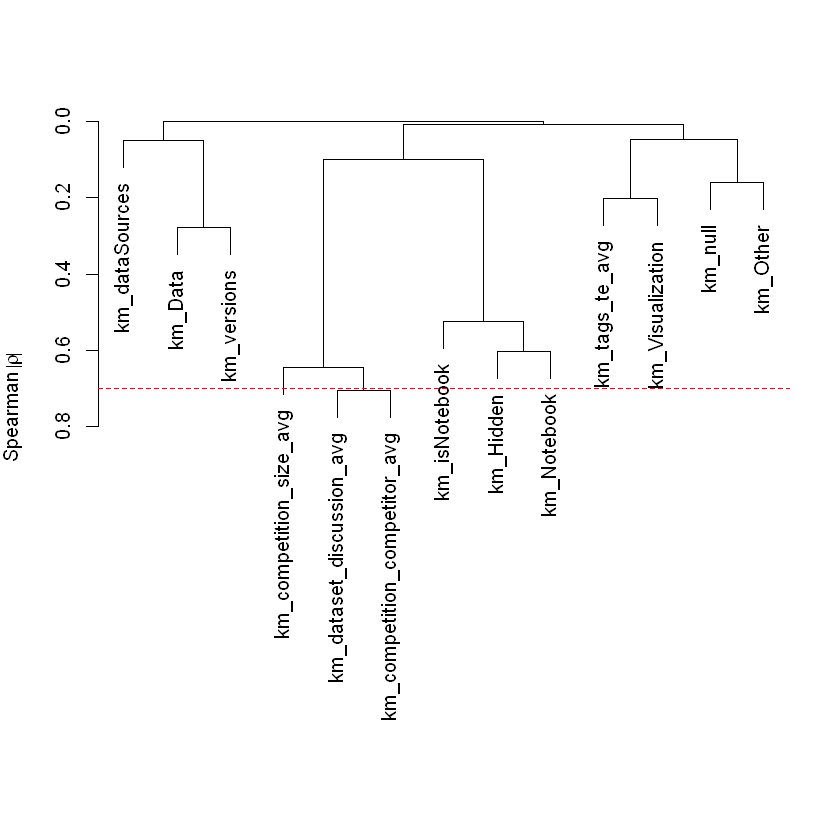

In [11]:
vcobj = varclus(~ .,
                
                data = data, 
                
                similarity = "spearman",
                
                trans = "abs"
)

pdf(file="correlation1.pdf", width = 11, height = 8.5)
plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)
dev.off()

plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)

# reject variables that closely related to each other. For now, we don't do this thing. 
reject_vars <- c()
env_vars <- env_vars[!(env_vars %in% reject_vars)]

png 
  2

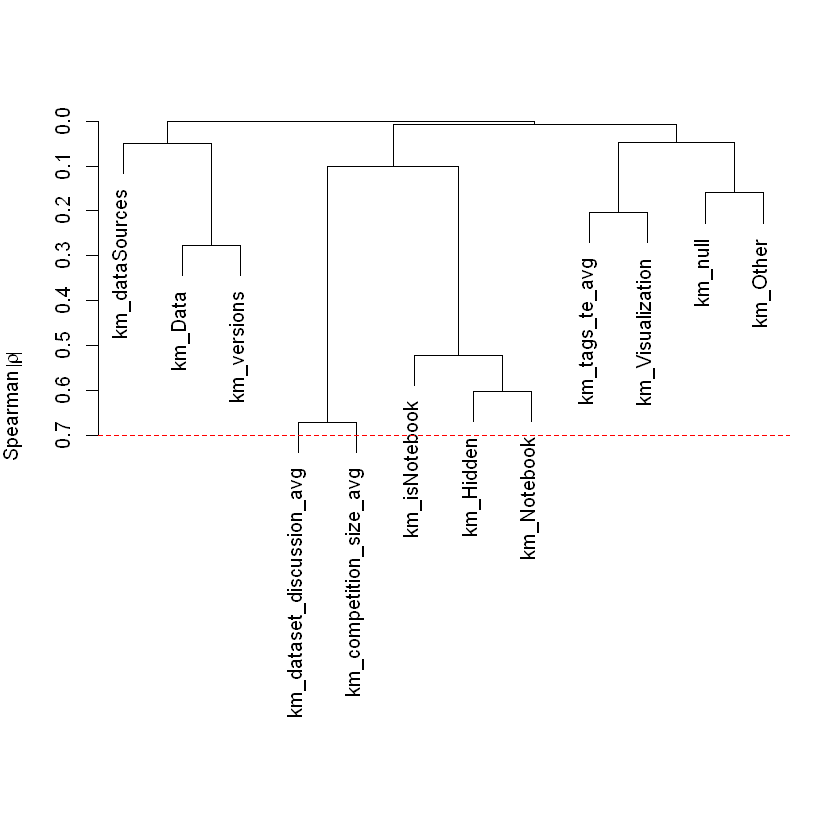

In [12]:
reject_vars <- c("km_competition_competitor_avg")
env_vars <- env_vars[!(env_vars %in% reject_vars)]
data <- data[env_vars]

vcobj = varclus(~ .,
                
                data = data, 
                
                similarity = "spearman",
                
                trans = "abs"
)

pdf(file="correlation2.pdf", width = 11, height = 8.5)
plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)
dev.off()

plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)

## Second Step is to prepare the dataframe, add the voted column back to dataframe. 

random forest model fitting referece: https://www.blopig.com/blog/2017/04/a-very-basic-introduction-to-random-forests-using-r/

### binary classification: 

In [13]:
data_classification = cbind(data, high_voted)

In [14]:
head(data_classification)

km_dataset_discussion_avg,km_competition_size_avg,km_tags_te_avg,km_dataSources,km_Data,km_versions,km_isNotebook,km_Hidden,km_Notebook,km_Visualization,km_null,km_Other,high_voted
0,2429309862,0.7687287,1,1,58,0.1895888,2,1,7,6,0,True
0,256630325,0.1741977,1,0,2,0.1895888,1,1,0,0,0,True
0,256630325,0.1741977,1,0,1,0.1895888,1,1,0,0,0,True
0,34757,0.7414633,1,0,5,0.1895888,1,1,2,0,0,True
0,256630325,0.1741977,1,0,3,0.1895888,1,1,0,0,0,True
0,256630325,0.7604732,1,1,12,0.1895888,1,1,24,0,0,True


This step is used for generating the binary label. 

In [15]:
summary(data_classification)

 km_dataset_discussion_avg km_competition_size_avg km_tags_te_avg  
 Min.   : 0.000            Min.   :0.000e+00       Min.   :0.0000  
 1st Qu.: 0.000            1st Qu.:0.000e+00       1st Qu.:0.1742  
 Median : 0.000            Median :3.476e+04       Median :0.1742  
 Mean   : 3.472            Mean   :7.020e+08       Mean   :0.2109  
 3rd Qu.: 3.000            3rd Qu.:1.605e+07       3rd Qu.:0.1742  
 Max.   :51.000            Max.   :1.026e+11       Max.   :1.0000  
 km_dataSources      km_Data          km_versions       km_isNotebook   
 Min.   : 0.000   Min.   :  0.0000   Min.   :   0.000   Min.   :0.1896  
 1st Qu.: 1.000   1st Qu.:  0.0000   1st Qu.:   0.000   1st Qu.:0.1896  
 Median : 1.000   Median :  0.0000   Median :   1.000   Median :0.1896  
 Mean   : 1.058   Mean   :  0.2447   Mean   :   3.804   Mean   :0.2089  
 3rd Qu.: 1.000   3rd Qu.:  0.0000   3rd Qu.:   3.000   3rd Qu.:0.1896  
 Max.   :58.000   Max.   :194.0000   Max.   :4046.000   Max.   :0.2965  
   km_Hidden 

## Then Divide the training and testing data

In [16]:
## 75% of the sample size
smp_size <- floor(0.75 * nrow(data_classification))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(data_classification)), size = smp_size)

train <- data_classification[train_ind, ]
test <- data_classification[-train_ind, ]

Then we fit the model.

In [17]:
#import the package
library(randomForest)
# Perform training:
rf_classifier2 = randomForest(as.factor(high_voted) ~ ., data=train, ntree=100, mtry=2, importance=TRUE)
# because of the as.factor(...), randomforest can fit a classification model. 
rf_classifier2

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin




Call:
 randomForest(formula = as.factor(high_voted) ~ ., data = train,      ntree = 100, mtry = 2, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 2

        OOB estimate of  error rate: 15.6%
Confusion matrix:
       False  True class.error
False 111880  5028  0.04300818
True   18019 12799  0.58469077

In [18]:
importance(rf_classifier2)

,False,True,MeanDecreaseAccuracy,MeanDecreaseGini
km_dataset_discussion_avg,9.828449,7.431448,16.295104,522.08121
km_competition_size_avg,12.469171,10.877390,20.257612,986.49853
km_tags_te_avg,28.153644,46.496309,41.161052,3435.16030
km_dataSources,23.112505,-2.681241,24.238779,320.38451
km_Data,10.056344,9.909291,18.960558,579.90153
km_versions,14.961840,39.826441,31.746092,6790.75295
km_isNotebook,11.255962,-3.284816,11.831767,353.42432
km_Hidden,12.330308,-3.294477,14.677014,619.28929
km_Notebook,15.813743,-2.030699,17.375699,518.55772
km_Visualization,9.294219,28.132586,27.175659,2881.09085


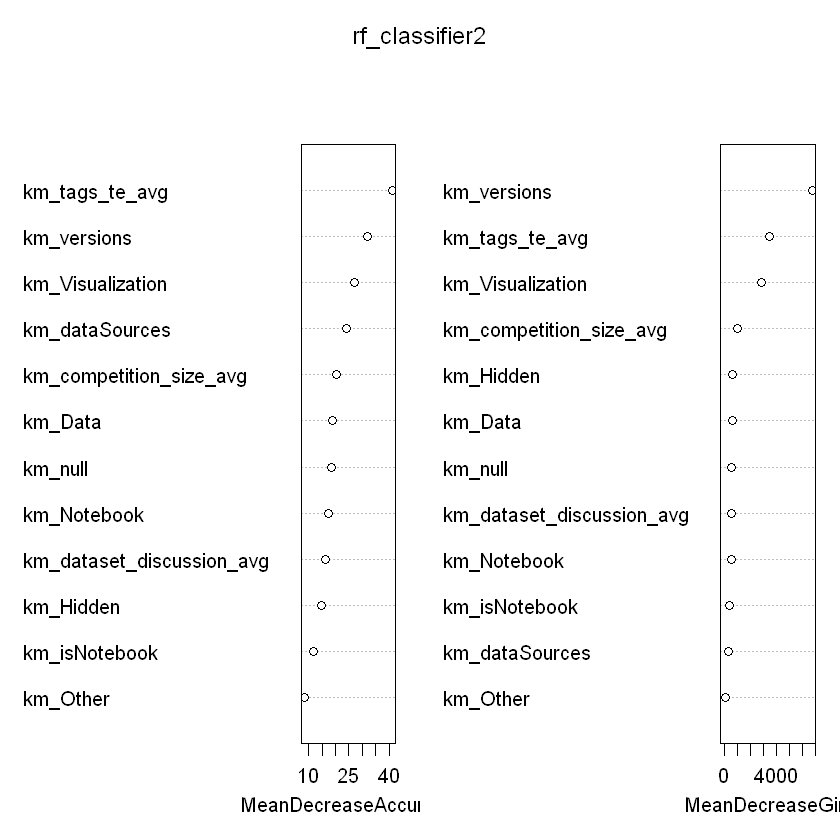

In [19]:
varImpPlot(rf_classifier2)

This is AUC. If the stackoverflow gave me the right answer. 

In [20]:
# import the library that needed in calculating the AUC. 
library(pROC)
library(ROCR)

Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [21]:
# https://stackoverflow.com/questions/46776944/how-to-calculate-randomforest-training-auc-in-r
# the train AUC
rf_p_train <- predict(rf_classifier2, type="prob")[,2]
rf_pr_train <- prediction(rf_p_train, train$high_vote)
r_auc_train <- performance(rf_pr_train, measure = "auc")@y.values[[1]] 
r_auc_train

[1] 0.8025871

In [22]:
#https://stats.stackexchange.com/questions/308645/why-does-randomforest-has-higher-test-auc-than-train-auc-is-this-possible
#the test AUC
rf_p_test <- predict(rf_classifier2, type="prob", newdata = test)[,2]
rf_pr_test <- prediction(rf_p_test, test$high_vote)
r_auc_test <- performance(rf_pr_test, measure = "auc")@y.values[[1]] 
r_auc_test

[1] 0.8239693

### Logistic Regression

In [19]:
library(rms)
fit <- lrm(high_voted ~ .,
           data=train, x=T, y=T)

In [20]:
val <- validate(fit, B=1000)
AUC = 0.5 + val[1,1]/2
AUC_optimism_reduced = (0.5 + val[1,5]/2)
AUC_optimism = AUC - AUC_optimism_reduced
print(c("AUC"=AUC,"AUC_optimism"=AUC_optimism))

         AUC AUC_optimism 
0.6434512055 0.0009310391 
